# Taxi


OpenAI Gym Taxi Example. This task was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%run rl_base.py
%run rl_model_base.py
%run rl_model_free_base.py
%run rl_model_free.py
%run simulated_mdp.py

In [3]:
import numpy as np 
import pandas as pd
import gym

In [5]:
env = gym.make('Taxi-v2')


#Model-based MDP
mdp = SimulatedMDP(env)

table = pd.DataFrame(columns=["Algorithm", "Policy", "Num Episodes", "Total Rewards", "Avg Rewards"])

## Model-Base Policy Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |


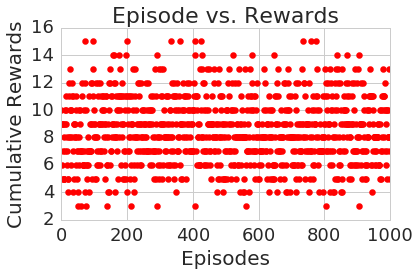

In [6]:
num_episodes = 1000
policy_strategy = "Random Policy"

# Created instance of class to run model based algorithms.# Creat 
model_rl = ModelBasedRL(max_eval=100)

# Changing number of iterations to speed up results. Results are still good without complete convergence.

# Number of evaluations for each state in policy evaluation.
model_rl.max_eval = 10

# Number of iterations of both policy evaluation and policy improvement.
model_rl.max_iter = 100

model_rl.policy_iteration(mdp)

# Simulating using policy that was learned and the last epsiode is displayed.
#num_episodes, total_reward, avg_reward = model_rl.simulate_policy(env)
model_rl.simulate_policy(env, num_episodes = 1000)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

table.loc[len(table)] = ["Model-Base Policy Iteration",policy_strategy,num_episodes,model_rl.total_reward,model_rl.avg_reward]        

## Model-Based Value Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+

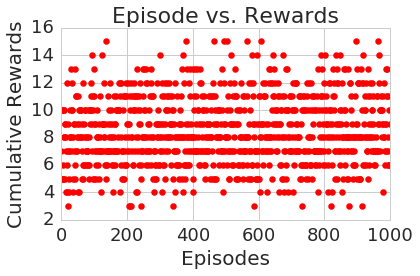

In [7]:
model_rl = ModelBasedRL(max_eval=100)

model_rl.value_iteration(mdp)

# Simulating using the policy that was learned and the last episode is displayed.
#num_episodes, total_reward, avg_reward = model_rl.simulate_policy(env)
model_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

table.loc[len(table)] = ["Model-Base Value Iteration", policy_strategy,num_episodes,model_rl.total_reward,model_rl.avg_reward]        


## Model-Base Q-value Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+

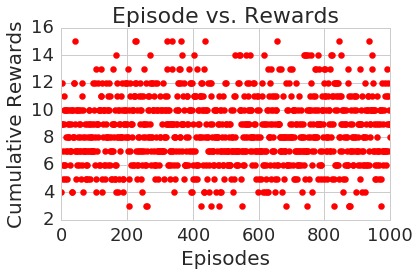

In [8]:
model_rl.max_eval = 100

model_rl.q_value_iteration(mdp)

# Simulating using policy that was learned and the last epsiode is displayed.
#num_episodes, total_reward, avg_reward = model_rl.simulate_policy(env)
model_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

table.loc[len(table)] = ["Model-Base Q-Value Iteration",policy_strategy,num_episodes,model_rl.total_reward,model_rl.avg_reward]        

## Model-Free

In [9]:
num_episodes = 2000
policy_strategy = "e-greedy"

# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)

# Model Free Reinforcement learning.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions, num_episodes=2000,policy_strategy='e-greedy')
  

## Model-Free SARSA

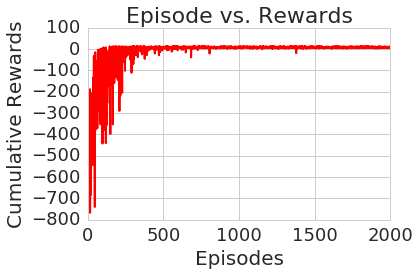

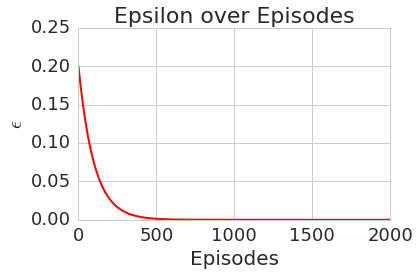

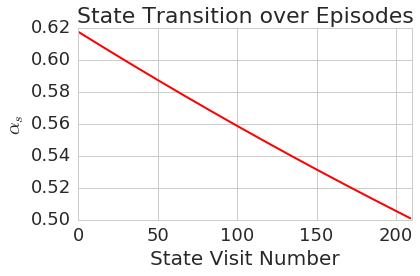

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |

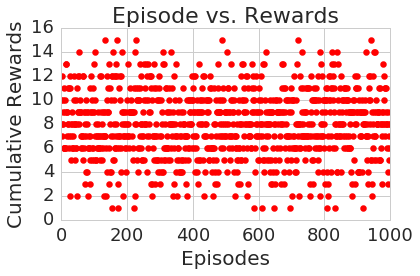

In [10]:
# Running the q-learning algorithm.
model_free_rl.sarsa(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
#num_episodes, total_reward, avg_reward = model_free_rl.simulate_policy(env)
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

table.loc[len(table)] = ["Model-Free SARSA Iteration",policy_strategy,num_episodes,model_rl.total_reward,model_rl.avg_reward]        

## Model-Free Q-Learning

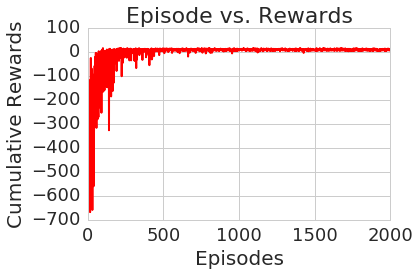

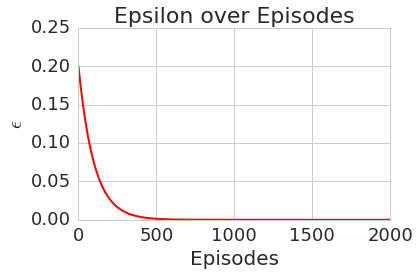

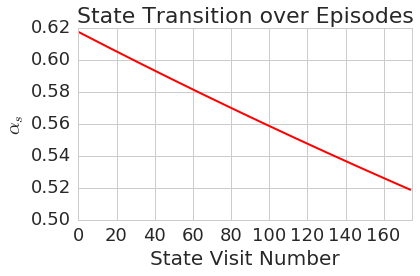

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R:_| : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+

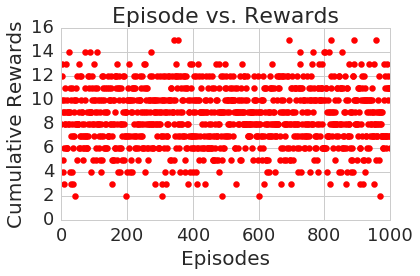

In [11]:
# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
#num_episodes, total_reward, avg_reward = model_free_rl.simulate_policy(env)
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

table.loc[len(table)] = ["Model-Free Q-Learning Iteration", policy_strategy,num_episodes,model_rl.total_reward,model_rl.avg_reward]        

In [12]:
table

,Algorithm,Policy,Num Episodes,Total Rewards,Avg Rewards
0,Model-Base Policy Iteration,Random Policy,1000.0,8483.0,8.483
1,Model-Base Value Iteration,Random Policy,1000.0,8493.0,8.493
2,Model-Base Q-Value Iteration,Random Policy,1000.0,8457.0,8.457
3,Model-Free SARSA Iteration,e-greedy,2000.0,8457.0,8.457
4,Model-Free Q-Learning Iteration,e-greedy,2000.0,8457.0,8.457
